# GPT-2

In [1]:
import os
import pandas as pd
import pickle
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Sample examples with explanations, predictions and scores

In [7]:
path = '/Users/kenzaamara/Storage/syntax-shap'
# '/cluster/work/zhang/kamara/syntax-shap'

In [8]:
data_save_dir = "/cluster/home/kamara/syntax-shap/data"
batch_size = 64

dataset = "generics"
model_name = "gpt2"
threshold_ = 0.5
seed_ = 0


#filter_ids_path = os.path.join(data_save_dir, f"{dataset}")
#with open(os.path.join(filter_ids_path, f"{dataset}_{model_name}_stats.pkl"), "rb") as f:
    #stats = pickle.load(f)

#print("Size of the dataset:", stats["n_data"])
#print("Size of filtered dataset:", stats["n_filtered"])
#print("Maximum number of batches:", stats["n_filtered"]//batch_size)

### Performance at thresholds

In [9]:

folder_path = os.path.join(path, f"results/scores/{model_name}/{dataset}")  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-5]
            model_name = parts[-4]
            algorithm = parts[-3]
            seed = parts[-2]
            threshold = parts[-1].split('.pkl')[0]  # Removes the file extension

            if (eval(seed) == seed_):
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)

                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                df['n_token'] = df['token_ids'].apply(len)
                df['threshold'] = eval(threshold)

                # Append to the list of dataframes
                df_list.append(df)

# Concatenate all dataframes in the list
df_final = pd.concat(df_list, ignore_index=True)
df_final


,fid_keep_rd,fid_keep,fid_rmv,log_odds_keep,acc_at_k,prob_diff_at_k,input_id,input,tokens,token_ids,algorithm,n_token,threshold
0,-0.090476,-0.111978,0.013342,2.239856,0.6,0.417243,4750,Screens are white or grey so that the movie sh...,"[Sc, reens, are, white, or, grey, so, th...","[3351, 5681, 389, 2330, 393, 13791, 523, 326, ...",svsampling,15,0.7
1,0.147359,0.028447,0.233642,-0.129831,0.7,0.044839,897,Word order is the other big,"[Word, order, is, the, other, big]","[26449, 1502, 318, 262, 584, 1263]",svsampling,6,0.7
2,0.002583,0.000796,0.002583,-0.368057,0.7,0.067207,3409,Instrumental conditioning is based off of a sy...,"[In, strument, al, conditioning, is, based,...","[818, 43872, 282, 21143, 318, 1912, 572, 286, ...",svsampling,13,0.7
3,0.024620,0.024620,0.024620,-10.111352,0.4,0.271443,1384,Many scientists practice what they call method...,"[Many, scientists, practice, what, they, ...","[7085, 5519, 3357, 644, 484, 869, 47935]",svsampling,7,0.7
4,-0.157005,0.225315,0.352435,-1.019732,0.6,0.043846,1783,Drum kits are the basis of most pop,"[Dr, um, kits, are, the, basis, of, most...","[6187, 388, 19183, 389, 262, 4308, 286, 749, 1...",svsampling,9,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240716,-0.048672,-0.016191,0.060423,0.237407,0.7,-0.001723,395,Billabongs appear often in Australian,"[Bill, ab, ongs, appear, often, in, Austra...","[17798, 397, 28079, 1656, 1690, 287, 6638]",syntax,7,0.9
240717,0.038208,0.144917,0.339799,-0.555961,0.9,0.036156,602,Aphids are found many places on,"[A, ph, ids, are, found, many, places, on]","[32, 746, 2340, 389, 1043, 867, 4113, 319]",syntax,8,0.9
240718,0.032949,0.025869,0.037191,-1.189247,0.5,0.533732,3278,Many areas contain areas with winds presently ...,"[Many, areas, contain, areas, with, winds...","[7085, 3006, 3994, 3006, 351, 13520, 27606, 11...",syntax,11,0.9
240719,0.025604,-0.035127,0.272589,0.112904,0.8,-0.005514,86,Scout movements are independent of,"[Sc, out, movements, are, independent, of]","[3351, 448, 8650, 389, 4795, 286]",syntax,6,0.9


/var/folders/2h/f06x9_xj7170hdxzgdbhs_7c0000gn/T/ipykernel_41072/217445073.py:15: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'svsampling': 'SampleShapley', 'hedge': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
/Users/kenzaamara/opt/anaconda3/envs/shap/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kenzaamara/opt/anaconda3/envs/shap/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarni

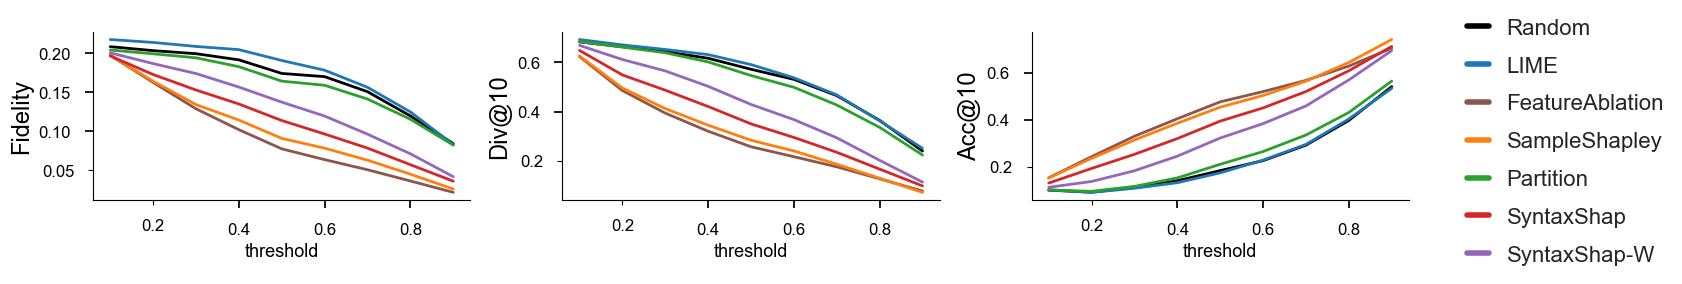

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = df_final.groupby(['algorithm', 'threshold']).mean(numeric_only=True).reset_index()

# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "ablation", "svsampling", "hedge", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'svsampling': 'SampleShapley', 'hedge': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "SampleShapley": pal[1], "Partition": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4], "FeatureAblation": pal[5]} 

legend_order = ["Random", "LIME", "FeatureAblation","SampleShapley", "Partition", "SyntaxShap", "SyntaxShap-W"]

fig, axes = plt.subplots(1, 3, figsize=(17,3))

# Adjusting various parameters
# Plotting with Seaborn
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Creating a lineplot for each score
sns.lineplot(x='threshold', y='fid_keep', hue='algorithm', data=df, ax=axes[0], palette=dict_color, linewidth=2)
axes[0].set_title('')
axes[0].set_xlabel('threshold', fontsize=13)
axes[0].set_ylabel('Fidelity', fontsize=17)
axes[0].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[1], palette=dict_color, linewidth=2)
axes[1].set_title('')
axes[1].set_xlabel('threshold', fontsize=13)
axes[1].set_ylabel('Div@10', fontsize=17)
axes[1].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='acc_at_k', hue='algorithm', data=df, ax=axes[2], palette=dict_color, linewidth=2)
axes[2].set_title('')
axes[2].set_xlabel('threshold', fontsize=13)
axes[2].set_ylabel('Acc@10', fontsize=17)
axes[2].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[2].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[2].legend(ordered_handles, ordered_labels, title='', loc='upper left', bbox_to_anchor=(1.1, 1.2), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(4)  # Increase line width in legend


#fig.suptitle(f'GPT-2, {dataset} dataset', fontsize=16)  # Adjust suptitle position

sns.despine()
plt.tight_layout()
fig.savefig(os.path.join(path, f"figures/{model_name}/{dataset}/scores_{model_name}_{dataset}.pdf"), bbox_inches='tight', dpi=600)
plt.show()

/var/folders/2h/f06x9_xj7170hdxzgdbhs_7c0000gn/T/ipykernel_41072/3088500248.py:14: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'svsampling': 'SampleShapley', 'hedge': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
/Users/kenzaamara/opt/anaconda3/envs/shap/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kenzaamara/opt/anaconda3/envs/shap/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarn

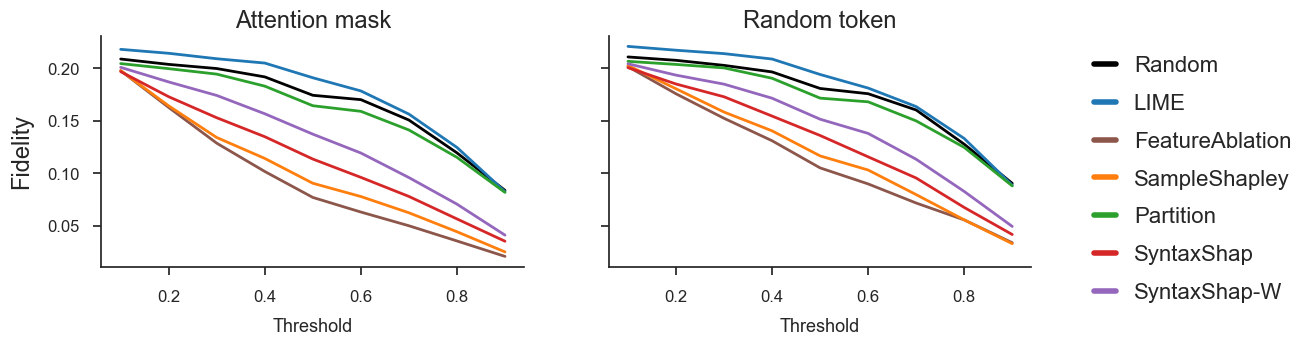

In [11]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping and aggregating data
df = df_final.groupby(['algorithm', 'threshold']).mean(numeric_only=True).reset_index()

# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "ablation", "svsampling", "hedge", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'svsampling': 'SampleShapley', 'hedge': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "SampleShapley": pal[1], "Partition": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4], "FeatureAblation": pal[5]} 

legend_order = ["Random", "LIME", "FeatureAblation","SampleShapley", "Partition", "SyntaxShap", "SyntaxShap-W"]


fig, axes = plt.subplots(1, 2, figsize=(12,3), sharey=True)

# Adjusting various parameters
# Plotting with Seaborn
sns.set_style("whitegrid")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Creating a lineplot for each score
sns.lineplot(x='threshold', y='fid_keep', hue='algorithm', data=df, ax=axes[0], palette=dict_color, linewidth=2)
axes[0].set_title('Attention mask', fontsize=17)
axes[0].set_xlabel('Threshold', fontsize=13, labelpad=10)
axes[0].set_ylabel('Fidelity', fontsize=17, labelpad=10)
axes[0].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='fid_keep_rd', hue='algorithm', data=df, ax=axes[1], palette=dict_color, linewidth=2)
axes[1].set_title('Random token', fontsize=17)
axes[1].set_xlabel('Threshold', fontsize=13, labelpad=10)
axes[1].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[1].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[1].legend(ordered_handles, ordered_labels, title='', loc='upper left', bbox_to_anchor=(1.1, 1), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(4)  # Increase line width in legend

sns.despine()
#plt.tight_layout()

fig.savefig(os.path.join(path, f"figures/{model_name}/{dataset}/masking_{model_name}_{dataset}.pdf"), bbox_inches='tight', dpi=600)
plt.show()

## Statistics analysis

In [12]:

folder_path = os.path.join(path, f"results/scores/{model_name}")  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-5]
            model_name = parts[-4]
            algorithm = parts[-3]
            seed = parts[-2]
            threshold = parts[-1].split('.pkl')[0]  # Removes the file extension

            if (eval(seed) == seed_) and (eval(threshold) == threshold_):# and (dataset != 'negation'):
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)
                print(df.head())
                print(df.columns)
                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                df['n_token'] = df['tokens'].apply(len)
                df['threshold'] = eval(threshold)
                df['dataset'] = dataset

                # Append to the list of dataframes
                df_list.append(df)

# Concatenate all dataframes in the list
df_final = pd.concat(df_list, ignore_index=True)
df_final


   fid_keep_rd  fid_keep   fid_rmv  log_odds_keep  acc_at_k  prob_diff_at_k  \
0     0.509906  0.446794  0.485001      -2.089302       0.4        0.427416   
1    -0.012198 -0.011281  0.023012       0.398921       0.6        0.144971   
2     0.002956  0.005976  0.008637      -1.177299       0.3        0.056074   
3     0.090475  0.036695  0.090475      -0.520158       0.8        0.125161   
4     0.007353  0.007353  0.007353      -8.903028       0.6        0.382964   

   input_id                                              input  \
0      3168  Libertarians think people can take care of the...   
1       486                        Protectionism is one of the   
2      4013  Death also increases any value of all items th...   
3       506                   Some people even learn about dog   
4      5174  Home plate is a piece of hard rubber and the o...   

                                              tokens  \
0  [Liber, tarians,  think,  people,  can,  take,...   
1          [Prot

,fid_keep_rd,fid_keep,fid_rmv,log_odds_keep,acc_at_k,prob_diff_at_k,input_id,input,tokens,token_ids,algorithm,n_token,threshold,dataset
0,0.509906,0.446794,0.485001,-2.089302,0.4,0.427416,3168,Libertarians think people can take care of the...,"[Liber, tarians, think, people, can, take,...","[31199, 28266, 892, 661, 460, 1011, 1337, 286,...",svsampling,12,0.5,generics
1,-0.012198,-0.011281,0.023012,0.398921,0.6,0.144971,486,Protectionism is one of the,"[Prot, ection, ism, is, one, of, the]","[19703, 3213, 1042, 318, 530, 286, 262]",svsampling,7,0.5,generics
2,0.002956,0.005976,0.008637,-1.177299,0.3,0.056074,4013,Death also increases any value of all items th...,"[Death, also, increases, any, value, of, ...","[20148, 635, 5732, 597, 1988, 286, 477, 3709, ...",svsampling,13,0.5,generics
3,0.090475,0.036695,0.090475,-0.520158,0.8,0.125161,506,Some people even learn about dog,"[Some, people, even, learn, about, dog]","[4366, 661, 772, 2193, 546, 3290]",svsampling,6,0.5,generics
4,0.007353,0.007353,0.007353,-8.903028,0.6,0.382964,5174,Home plate is a piece of hard rubber and the o...,"[Home, plate, is, a, piece, of, hard, r...","[16060, 7480, 318, 257, 3704, 286, 1327, 14239...",svsampling,15,0.5,generics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44126,0.089452,0.089452,0.084129,-11.401474,0.3,0.340624,993,He was eager to see Disney World and the,"[He, was, eager, to, see, Disney, World,...","[1544, 373, 11069, 284, 766, 8519, 2159, 290, ...",syntax,9,0.5,rocstories
44127,0.036601,0.035576,0.052324,-1.139141,0.4,0.339789,896,The site said his browser could not view the,"[The, site, said, his, browser, could, n...","[464, 2524, 531, 465, 6444, 714, 407, 1570, 262]",syntax,9,0.5,rocstories
44128,0.060946,0.065787,0.102231,-1.031452,0.6,0.588254,1046,The elderly woman was sitting on the porch swi...,"[The, elderly, woman, was, sitting, on, ...","[464, 13830, 2415, 373, 5586, 319, 262, 33179,...",syntax,10,0.5,rocstories
44129,0.012033,0.012033,0.012033,-9.395524,0.3,0.254440,943,Lisabeth was rushed into emergency surgery to ...,"[L, is, abeth, was, rushed, into, emergenc...","[43, 271, 9407, 373, 13999, 656, 6334, 8185, 2...",syntax,11,0.5,rocstories


### Number of tokens

0          0
1          1
2          3
3          4
4          5
        ... 
3567    5361
3568    5368
3569    5370
3570    5373
3571    5388
Name: input_id, Length: 3572, dtype: int64


/var/folders/2h/f06x9_xj7170hdxzgdbhs_7c0000gn/T/ipykernel_34893/2495089428.py:22: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(data=df, x='n_token', hue='dataset', palette=sns.color_palette("Dark2"), width=0.8, edgecolor='white')
/Users/kenzaamara/opt/anaconda3/envs/shap/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kenzaamara/opt/anaconda3/envs/shap/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kenzaamara/opt/anaconda

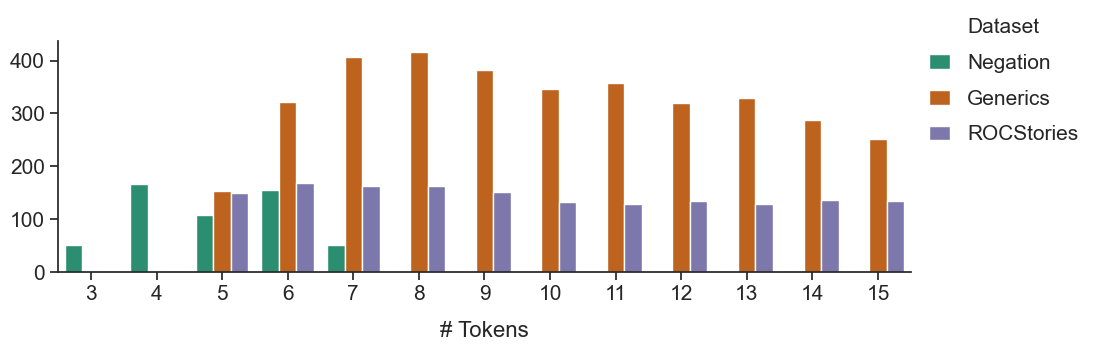

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df_final[['input_id', 'input', 'n_token', 'dataset']]
df = df.groupby(['dataset', 'input_id']).mean(numeric_only=True).reset_index()
df['n_token'] = df['n_token'].apply(lambda x: int(x))
print(df[df['dataset'] == 'generics']['input_id'])
order = ['negation', 'generics', 'rocstories']
df = df.sort_values(by='dataset', key=lambda x: x.map({v: i for i, v in enumerate(order)}))
df['dataset'] = df['dataset'].replace({'negation': 'Negation', 'generics': 'Generics', 'rocstories': 'ROCStories'})


# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Plotting
plt.figure(figsize=(11, 3))
sns.countplot(data=df, x='n_token', hue='dataset', palette=sns.color_palette("Dark2"), width=0.8, edgecolor='white')
plt.xlabel('# Tokens', fontsize=16, labelpad=12)
plt.ylabel(None)

legend = plt.legend(title='Dataset', loc='upper left', bbox_to_anchor=(1, 1.18), fontsize=15, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('15')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(4)  # Increase line width in legend

#plt.legend([],[], frameon=False)
sns.despine()

plt.savefig(os.path.join(path, f"figures/{model_name}/scores_{model_name}_n_token_count.pdf"), bbox_inches='tight', dpi=600)

plt.show()


/var/folders/2h/f06x9_xj7170hdxzgdbhs_7c0000gn/T/ipykernel_34893/1165868427.py:18: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'svsampling': 'SampleShapley', 'hedge': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
/Users/kenzaamara/opt/anaconda3/envs/shap/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kenzaamara/opt/anaconda3/envs/shap/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarn

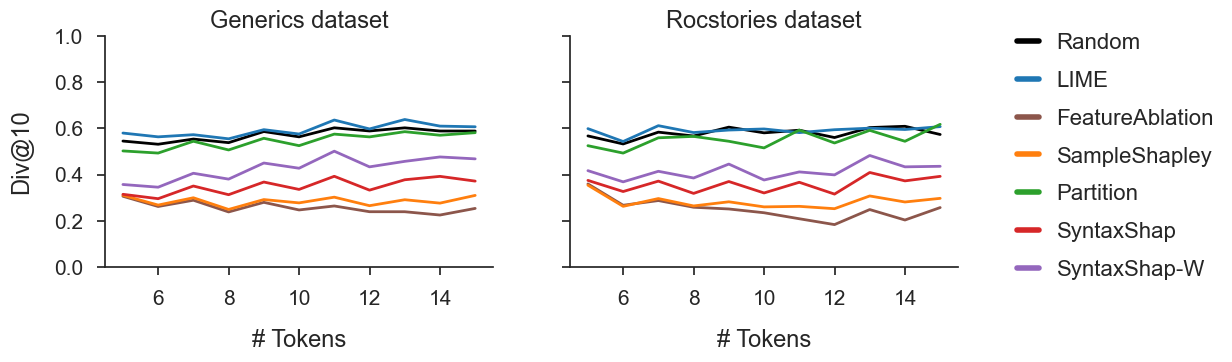

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = df_final.groupby(['algorithm', 'dataset', 'n_token']).mean(numeric_only=True).reset_index()
df = df[df['dataset'] != 'negation']
df = df[df['n_token'] <= 15]


# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "ablation", "svsampling", "hedge", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'svsampling': 'SampleShapley', 'hedge': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "SampleShapley": pal[1], "Partition": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4], "FeatureAblation": pal[5]} 

legend_order = ["Random", "LIME", "FeatureAblation","SampleShapley", "Partition", "SyntaxShap", "SyntaxShap-W"]

fig, axes = plt.subplots(1, 2, figsize=(11,3), sharey=True)

# Adjusting various parameters
# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 17, "ytick.labelsize" : 17})


# Creating a lineplot for each score
sns.lineplot(x='n_token', y='prob_diff_at_k', hue='algorithm', data=df[df['dataset']=='generics'], ax=axes[0], palette=dict_color, linewidth=2)#, errorbar='se')#, err_style='bars')
axes[0].set_title('Generics dataset', fontsize=17)
axes[0].set_xlabel('# Tokens', fontsize=17, labelpad=15)
axes[0].set_ylabel('Div@10', fontsize=17, labelpad=15)
axes[0].tick_params(axis='both', which='major', labelsize=15, pad=10)  # Increase tick font size and padding
axes[0].set_ylim(0, 1)

sns.lineplot(x='n_token', y='prob_diff_at_k', hue='algorithm', data=df[df['dataset']=='rocstories'], ax=axes[1], palette=dict_color, linewidth=2)#, errorbar='se')#, err_style='bars')
axes[1].set_title('Rocstories dataset', fontsize=17)
axes[1].set_xlabel('# Tokens', fontsize=17, labelpad=15)
axes[1].set_ylabel('Div@10', fontsize=17, labelpad=15)
axes[1].tick_params(axis='both', which='major', labelsize=15, pad=10)  # Increase tick font size and padding
axes[1].set_ylim(0, 1)
# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[1].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[1].legend(ordered_handles, ordered_labels, title='', loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(4)  # Increase line width in legend

#fig.suptitle(f'MistralAI 7b, {dataset} dataset', fontsize=16)  # Adjust suptitle position

sns.despine()
#plt.tight_layout()
plt.show()

fig.savefig(os.path.join(path, f"figures/{model_name}/scores_{model_name}_n_tokens_vs_performance.pdf"), bbox_inches='tight', dpi=600)


### Dependency distance

In [6]:
import spacy
import textdescriptives as td


nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('textdescriptives')


def get_dpdcy_dist(text):
    text = str(text)
    doc = nlp(text)
    dd = doc._.dependency_distance['dependency_distance_mean']
    return dd


ValueError: [E002] Can't find factory for 'textdescriptives' for language English (en). This usually happens when spaCy calls `nlp.create_pipe` with a custom component name that's not registered on the current language class. If you're using a Transformer, make sure to install 'spacy-transformers'. If you're using a custom component, make sure you've added the decorator `@Language.component` (for function components) or `@Language.factory` (for class components).

Available factories: attribute_ruler, tok2vec, merge_noun_chunks, merge_entities, merge_subtokens, token_splitter, doc_cleaner, parser, beam_parser, lemmatizer, trainable_lemmatizer, entity_linker, entity_ruler, tagger, morphologizer, ner, beam_ner, senter, sentencizer, spancat, spancat_singlelabel, span_finder, future_entity_ruler, span_ruler, textcat, textcat_multilabel, textdescriptives/coherence, textdescriptives/dependency_distance, textdescriptives/descriptive_stats, textdescriptives/pos_proportions, textdescriptives/quality, textdescriptives/readability, textdescriptives/information_theory, textdescriptives/all, en.lemmatizer

In [16]:
df_final['dependency_dist'] = df_final['input'].apply(lambda x: get_dpdcy_dist(x))
df_final.to_csv(os.path.join(path, f"dependency_distance/scores_{model_name}_{threshold_}_seed{seed_}.csv"), index=False)

In [15]:
df_final = pd.read_csv(f"/cluster/home/kamara/syntax-shap/results/scores_{model_name}_{threshold_}_seed{seed_}.csv")

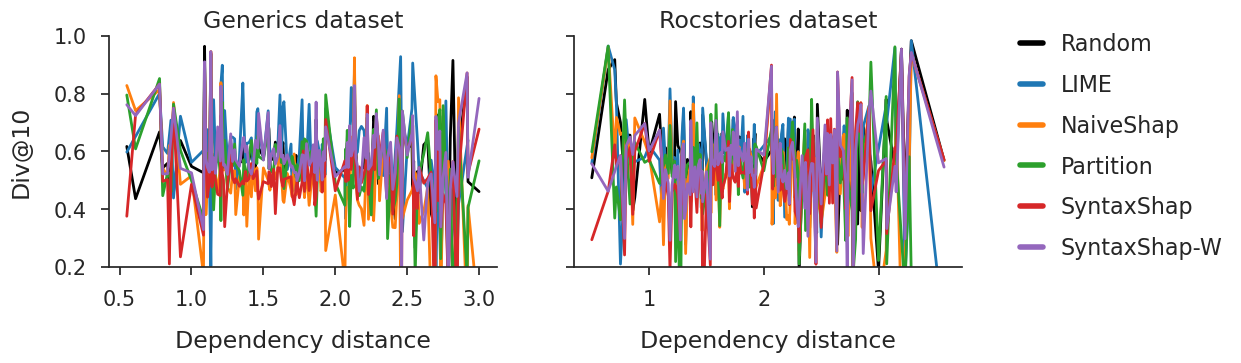

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = df_final.groupby(['algorithm', 'dataset', 'dependency_dist', 'n_token']).mean().reset_index()
df = df[df['dataset'] != 'negation']
df = df[df['n_token'] <= 15]


# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "ablation", "svsampling", "hedge", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'svsampling': 'SampleShapley', 'hedge': 'HEDGE', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "SampleShapley": pal[1], "HEDGE": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4], "FeatureAblation": pal[5]} 

legend_order = ["Random", "LIME", "FeatureAblation","SampleShapley", "HEDGE", "SyntaxShap", "SyntaxShap-W"]


df = df[df['algorithm']=='SyntaxShap']

fig, axes = plt.subplots(1, 2, figsize=(11,3), sharey=True)

# Adjusting various parameters
# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 17, "ytick.labelsize" : 17})


sns.scatterplot(x='n_token', y='dependency_dist', hue='prob_diff_at_k', data=df[df['dataset']=='generics'], ax=axes[0], palette=sns.color_palette('coolwarm'))#, errorbar='se')#, err_style='bars')
axes[0].set_title('Generics dataset', fontsize=17)
axes[0].set_xlabel('Number of tokens', fontsize=17, labelpad=15)
axes[0].set_ylabel('Dependency distance', fontsize=17, labelpad=15)
axes[0].tick_params(axis='both', which='major', labelsize=15, pad=10)  # Increase tick font size and padding

sns.scatterplot(x='n_token', y='dependency_dist', hue='prob_diff_at_k', data=df[df['dataset']=='rocstories'], ax=axes[0], palette=sns.color_palette('coolwarm'))#, errorbar='se')#, err_style='bars')
axes[0].set_title('ROCStories dataset', fontsize=17)
axes[0].set_xlabel('Number of tokens', fontsize=17, labelpad=15)
axes[0].set_ylabel('Dependency distance', fontsize=17, labelpad=15)
axes[0].tick_params(axis='both', which='major', labelsize=15, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

legend = axes[1].legend(title='Div@10', loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size

#fig.suptitle(f'MistralAI 7b, {dataset} dataset', fontsize=16)  # Adjust suptitle position

sns.despine()
#plt.tight_layout()
plt.show()

#fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/scores_{model_name}_dependency_dist_vs_performance.pdf", bbox_inches='tight', dpi=600)


In [18]:
df_final[df_final['dataset'] == 'generics']['dependency_dist'].max()

3.0

bins_generics [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
max generics dpdc dist:  3
bins_rocstories [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
max rocstories dpdc dist:  3


/tmp/ipykernel_16317/3847303570.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_generics['dependency_dist_bin'] = pd.cut(df_generics['dependency_dist'], bins=bins_generics)
/tmp/ipykernel_16317/3847303570.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rocstories['dependency_dist_bin'] = pd.cut(df_rocstories['dependency_dist'], bins=bins_rocstories)
/tmp/ipykernel_16317/3847303570.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or

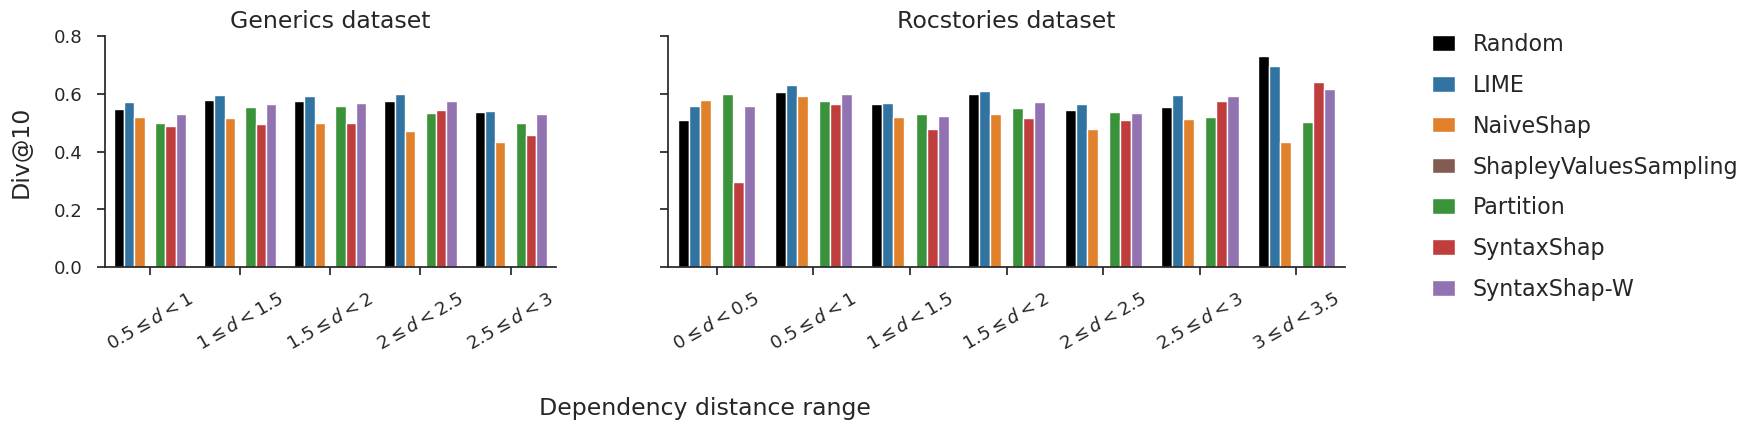

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for illustration

# Define bins for each dataset independently
bins_generics = [x / 2 for x in range(1, int(df_final[df_final['dataset'] == 'generics']['dependency_dist'].max() * 2) + 1)]
bins_rocstories = [x / 2 for x in range(0, int(df_final[df_final['dataset'] == 'rocstories']['dependency_dist'].max() * 2) + 1)]
print('bins_generics', bins_generics)
print('max generics dpdc dist: ', int(df_final[df_final['dataset'] == 'generics']['dependency_dist'].max()))
print('bins_rocstories', bins_rocstories)
print('max rocstories dpdc dist: ', int(df_final[df_final['dataset'] == 'rocstories']['dependency_dist'].max()))


# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "ablation", "svsampling", "hedge", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df = df_final.copy()
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'svsampling': 'SampleShapley', 'hedge': 'HEDGE', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "SampleShapley": pal[1], "HEDGE": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4], "FeatureAblation": pal[5]} 

legend_order = ["Random", "LIME", "FeatureAblation","SampleShapley", "HEDGE", "SyntaxShap", "SyntaxShap-W"]


# Create bins for each dataset
df_generics = df[df['dataset'] == 'generics']
df_generics['dependency_dist_bin'] = pd.cut(df_generics['dependency_dist'], bins=bins_generics)
df_generics = df_generics.groupby(['algorithm', 'dataset', 'dependency_dist_bin']).mean().reset_index()

df_rocstories = df[df['dataset'] == 'rocstories']
df_rocstories['dependency_dist_bin'] = pd.cut(df_rocstories['dependency_dist'], bins=bins_rocstories)
df_rocstories = df_rocstories.groupby(['algorithm', 'dataset', 'dependency_dist_bin']).mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16,3), sharey=True, gridspec_kw={'width_ratios': [1, 1.5]})

# Adjusting various parameters
# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 17, "ytick.labelsize" : 17})

# Creating a lineplot for each score
sns.barplot(x='dependency_dist_bin', y='prob_diff_at_k', hue='algorithm', data=df_generics, ax=axes[0], palette=dict_color)
axes[0].set_title('Generics dataset', fontsize=17)
axes[0].set_xlabel(None)
axes[0].set_ylabel('Div@10', fontsize=17, labelpad=15)
axes[0].tick_params(axis='both', which='major', labelsize=13, pad=10)
axes[0].set_ylim(0, 0.8)
axes[0].tick_params(axis='x', rotation=30) 

sns.barplot(x='dependency_dist_bin', y='prob_diff_at_k', hue='algorithm', data=df_rocstories, ax=axes[1], palette=dict_color)
axes[1].set_title('Rocstories dataset', fontsize=17)
axes[1].set_xlabel(None)
axes[1].set_ylabel('Div@10', fontsize=17, labelpad=15)
axes[1].tick_params(axis='both', which='major', labelsize=13, pad=10)
axes[1].tick_params(axis='x', rotation=30) 

# Change x-axis labels
axes[0].set_xticklabels([r'$0.5\leq d<1$', r'$1\leq d<1.5$', r'$1.5\leq d<2$', r'$2\leq d<2.5$', r'$2.5\leq d<3$'])
axes[1].set_xticklabels([r'$0\leq d<0.5$', r'$0.5\leq d<1$', r'$1\leq d<1.5$', r'$1.5\leq d<2$', r'$2\leq d<2.5$', r'$2.5\leq d<3$', r'$3\leq d<3.5$'])

fig.supxlabel("Dependency distance range", fontsize=17, x=0.5, y=-0.4)

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[1].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[1].legend(ordered_handles, ordered_labels, title='', loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')

sns.despine()
#fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/scores_{model_name}_dependency_dist_bins.pdf", bbox_inches='tight', dpi=600)
plt.show()


bins_generics [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
max generics dpdc dist:  3
bins_rocstories [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
max rocstories dpdc dist:  3


/tmp/ipykernel_16317/2149820465.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_generics['dependency_dist_bin'] = pd.cut(df_generics['dependency_dist'], bins=bins_generics)
/tmp/ipykernel_16317/2149820465.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rocstories['dependency_dist_bin'] = pd.cut(df_rocstories['dependency_dist'], bins=bins_rocstories)


ValueError: The palette dictionary is missing keys: {'svsampling'}

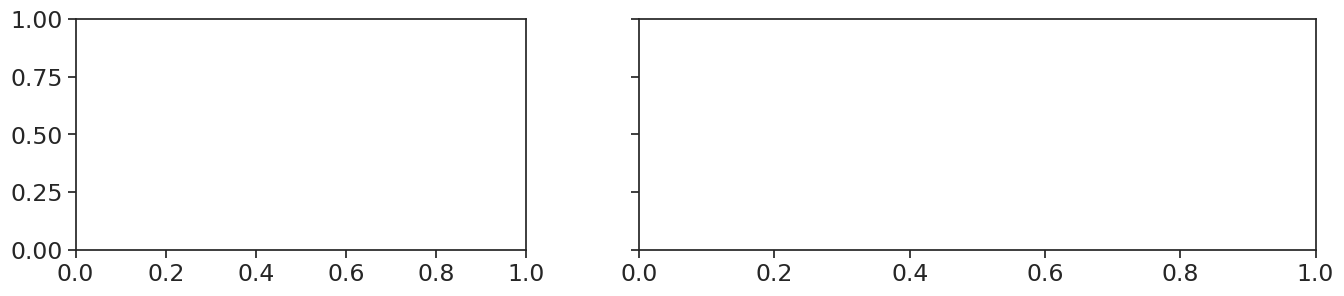

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for illustration

# Define bins for each dataset independently
bins_generics = [x / 2 for x in range(1, int(df_final[df_final['dataset'] == 'generics']['dependency_dist'].max() * 2) + 1)]
bins_rocstories = [x / 2 for x in range(0, int(df_final[df_final['dataset'] == 'rocstories']['dependency_dist'].max() * 2) + 1)]
print('bins_generics', bins_generics)
print('max generics dpdc dist: ', int(df_final[df_final['dataset'] == 'generics']['dependency_dist'].max()))
print('bins_rocstories', bins_rocstories)
print('max rocstories dpdc dist: ', int(df_final[df_final['dataset'] == 'rocstories']['dependency_dist'].max()))

# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "ablation", "svsampling", "hedge", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df = df_final.copy()
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'svsampling': 'SampleShapley', 'hedge': 'HEDGE', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "SampleShapley": pal[1], "HEDGE": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4], "FeatureAblation": pal[5]} 

legend_order = ["Random", "LIME", "FeatureAblation","SampleShapley", "HEDGE", "SyntaxShap", "SyntaxShap-W"]

# Create bins for each dataset
df_generics = df[df['dataset'] == 'generics']
df_generics['dependency_dist_bin'] = pd.cut(df_generics['dependency_dist'], bins=bins_generics)
df_generics = df_generics.groupby(['algorithm', 'dataset', 'dependency_dist_bin']).mean().reset_index()

df_rocstories = df[df['dataset'] == 'rocstories']
df_rocstories['dependency_dist_bin'] = pd.cut(df_rocstories['dependency_dist'], bins=bins_rocstories)
df_rocstories = df_rocstories.groupby(['algorithm', 'dataset', 'dependency_dist_bin']).mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16,3), sharey=True, gridspec_kw={'width_ratios': [1, 1.5]})

# Adjusting various parameters
# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 17, "ytick.labelsize" : 17})

# Creating a lineplot for each score
df_generics['dependency_dist_bin'] = df_generics['dependency_dist_bin'].astype(str)
sns.lineplot(x='dependency_dist_bin', y='prob_diff_at_k', hue='algorithm', data=df_generics, ax=axes[0], palette=dict_color, linewidth=2)
axes[0].set_title('Generics dataset', fontsize=17)
axes[0].set_xlabel(None)
axes[0].set_ylabel('Div@10', fontsize=17, labelpad=15)
axes[0].tick_params(axis='both', which='major', labelsize=13, pad=10)
axes[0].set_ylim(0.2, 0.8)
axes[0].tick_params(axis='x', rotation=30) 

df_rocstories['dependency_dist_bin'] = df_rocstories['dependency_dist_bin'].astype(str)
sns.lineplot(x='dependency_dist_bin', y='prob_diff_at_k', hue='algorithm', data=df_rocstories, ax=axes[1], palette=dict_color, linewidth=2)
axes[1].set_title('Rocstories dataset', fontsize=17)
axes[1].set_xlabel(None)
axes[1].set_ylabel('Div@10', fontsize=17, labelpad=15)
axes[1].tick_params(axis='both', which='major', labelsize=13, pad=10)
axes[1].tick_params(axis='x', rotation=30) 

# Change x-axis labels
axes[0].set_xticklabels([r'$0.5\leq d<1$', r'$1\leq d<1.5$', r'$1.5\leq d<2$', r'$2\leq d<2.5$', r'$2.5\leq d<3$'])
axes[1].set_xticklabels([r'$0\leq d<0.5$', r'$0.5\leq d<1$', r'$1\leq d<1.5$', r'$1.5\leq d<2$', r'$2\leq d<2.5$', r'$2.5\leq d<3$', r'$3\leq d<3.5$'])

fig.supxlabel("Dependency distance range", fontsize=17, x=0.5, y=-0.4)

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[1].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[1].legend(ordered_handles, ordered_labels, title='', loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')

sns.despine()
#fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/scores_{model_name}_dependency_dist_lineplot.pdf", bbox_inches='tight', dpi=600)
plt.show()
